In [244]:
import numpy as np
import pandas as pd
data = pd.read_excel('data/action_embedding.xlsx')
data = np.array(data)

In [242]:
print(data[-1])
name = data[:,0]
name[-1] = 'End'
# data = data[:-11,1:-10] # only guns
data = data[:,1:]
print(name)

['End' 8 0 0 0 0.0 0.0 0.0 0 0 0 0.0 0 nan 0.0 0 0 0 0 0 0 0 0 0 1 1 0]
['Desert Eagle' 'R8 Revolver' 'Dual Berettas' 'Five-SeveN' 'Glock-18'
 'P2000' 'USP-S' 'P250' 'CZ75 Auto' 'Tec-9' 'Mag-7' 'Nova' 'Sawed-Off'
 'XM1014' 'PP-Bizon' 'MAC-10' 'MP7' 'MP5-SD' 'MP9' 'P90' 'UMP-45' 'AK-47'
 'AUG' 'FAMAS' 'Galil AR' 'M4A4' 'M4A1-S' 'SG 553' 'M249' 'Negev' 'AWP'
 'G3SG1' 'SCAR-20' 'SSG 08' 'High Explosive Grenade' 'Decoy Grenade'
 'Molotov' 'Incendiary Grenade' 'Flashbang' 'Smoke Grenade' 'Vest'
 'Vesthelm' 'Zeus x27' 'Defuse Kit' 'End']


In [248]:
print(data[:,2])
np.save('data/action_money.npy', data[:,2])

[700 600 400 500 200 200 200 300 500 500 1300 1050 1100 2000 1400 1050
 1500 1500 1250 2350 1200 2700 3300 2050 1800 3100 3100 3000 5200 1700
 4750 5000 5000 1700 300 50 400 600 200 300 650 1000 200 400 0]


In [243]:
np.save('action_name.npy', name)

In [211]:
# Convert discrete attribute to numbers

# Hold to shoot
for i in range(len(data)):
    if data[i][12] == 'No': data[i,12] = 1
    elif data[i][12] == 'Yes': data[i,12] = 2
    else:  data[i][12] = 0
# data[data == float('nan')] = 0
# data[data == 'No'] = 1
# data[data == 'Yes'] = 2

# Tracers
data[data == 'None'] = 0
data[data == 'Every Bullet'] = 1
data[data == 'Every Third'] = 2

# Recoil pattern
data[data == 'Random'] = 0
data[data == 'Set Pattern'] = 1

# remove gun name

In [212]:
print(data[0])

[0 700 300 63 0.932 266.6666667 2.0 7 35 230 0.6 4096 1 48.2 60 0 0 0 0 0
 0 0 0 0 5 1]


In [213]:
from sklearn.preprocessing import normalize
data_norm = data
for i in range(data.shape[1]):
    #if i != 13:
    data_norm[:,i] = data_norm[:,i] / np.linalg.norm(data_norm[:,i])

In [217]:
print(data_norm[1].astype(float))

[0.         0.04380029 0.10646602 0.14854414 0.19893438 0.03768544
 0.20519567 0.03463463 0.01345707 0.11883842 0.11785681 0.1150848
 0.19611614 0.06349135 0.13219981 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.17010345 0.05954913]


In [239]:
np.save('action_embedding.npy', data_norm.astype(float)[:,1:-1])

45


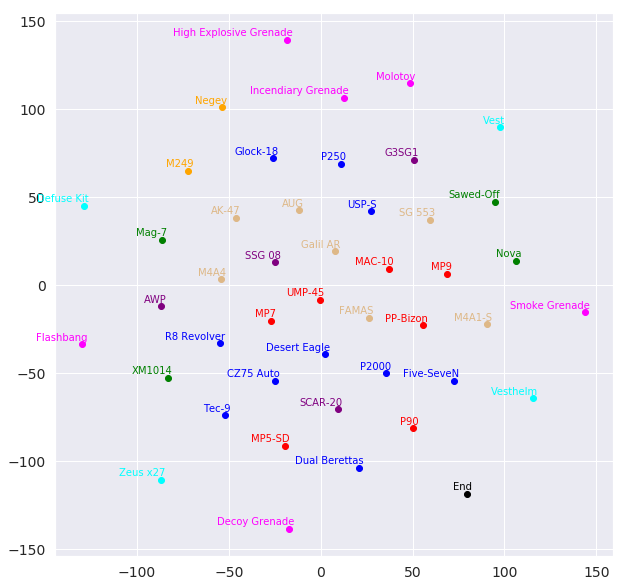

In [238]:
# Visualization
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

def tsne_plot(name, data):
    "Creates and TSNE model and plots it"
    data = data.astype(float)[:,1:-1]
    #for i in range(len(data)):
    #    print(data[i])
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(data)
    types = ['blue']*10+['green']*4+['red']*7+['burlywood']*7+['orange']*2+['purple']*4+['magenta']*6+['cyan']*4+['black']
    print(len(types))
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(10, 10)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i],color = types[i])
        plt.annotate(name[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom',
                     color = types[i])
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.savefig("t-SNE.png", bbox_inches='tight')
    plt.show()
    
tsne_plot(name,data_norm)

45


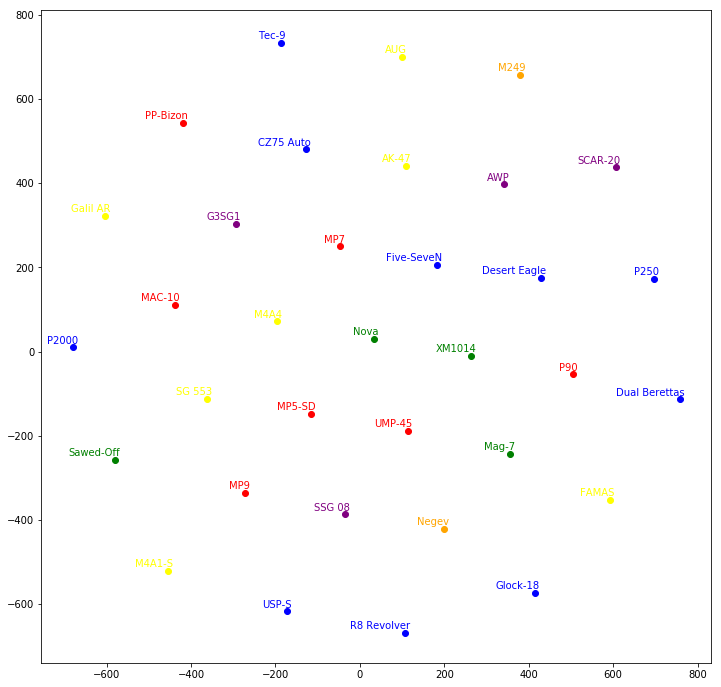

In [186]:
tsne_plot(name,data)